In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from src.data.loaders import CommodityLoader
from src.models.ensemble.dynamic_selection.dcs_la.dynamic_selection_by_local_accuracy import DCSLARegressor

import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [23]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 
}
plt.rcParams.update(dark_style)
rcParams['figure.figsize'] = (18,7)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [24]:
models = [
    LGBMRegressor(n_estimators=100, max_depth=3, random_state=42, verbose=-1),
    XGBRegressor(n_estimators=100, max_depth=3, random_state=42, verbosity=0),
    KNeighborsRegressor(n_neighbors=5, weights='distance'),
    MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, early_stopping=False, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
]

In [25]:
df_brl = CommodityLoader.load_all_commodities(currency='BRL', preprocessing=True, monthly_aggregation='mean', limit_date=None)

ദ്ദി・ᴗ・)✧ acucar_santos carregado com sucesso
ദ്ദി・ᴗ・)✧ acucar_sp carregado com sucesso
ദ്ദി・ᴗ・)✧ algodao carregado com sucesso
ദ്ദി・ᴗ・)✧ arroz carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_arabica carregado com sucesso
ദ്ദി・ᴗ・)✧ cafe_robusta carregado com sucesso
ദ്ദി・ᴗ・)✧ milho carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ soja_paranagua carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_parana carregado com sucesso
ദ്ദി・ᴗ・)✧ trigo_rs carregado com sucesso


In [26]:
df_brl['unique_id'].unique()

array(['ACUCAR_SANTOS', 'ACUCAR_SP', 'ALGODAO', 'ARROZ', 'CAFE_ARABICA',
       'CAFE_ROBUSTA', 'MILHO', 'SOJA_PARANA', 'SOJA_PARANAGUA',
       'TRIGO_PARANA', 'TRIGO_RS'], dtype=object)


=== Série: ACUCAR_SANTOS ===
Valores reais:     [142.99, 145.2, 137.43, 149.37, 158.95, 156.77, 156.9, 144.85, 145.57, 145.63, 139.22, 131.22]
Valores previstos: [156.12, 148.72, 146.49, 144.02, 140.96, 155.73, 166.38, 159.29, 158.8, 157.24, 162.06, 160.9]
MSE: 219.16 | RMSE: 14.80 | MAE: 12.61 | MAPE: 0.09%


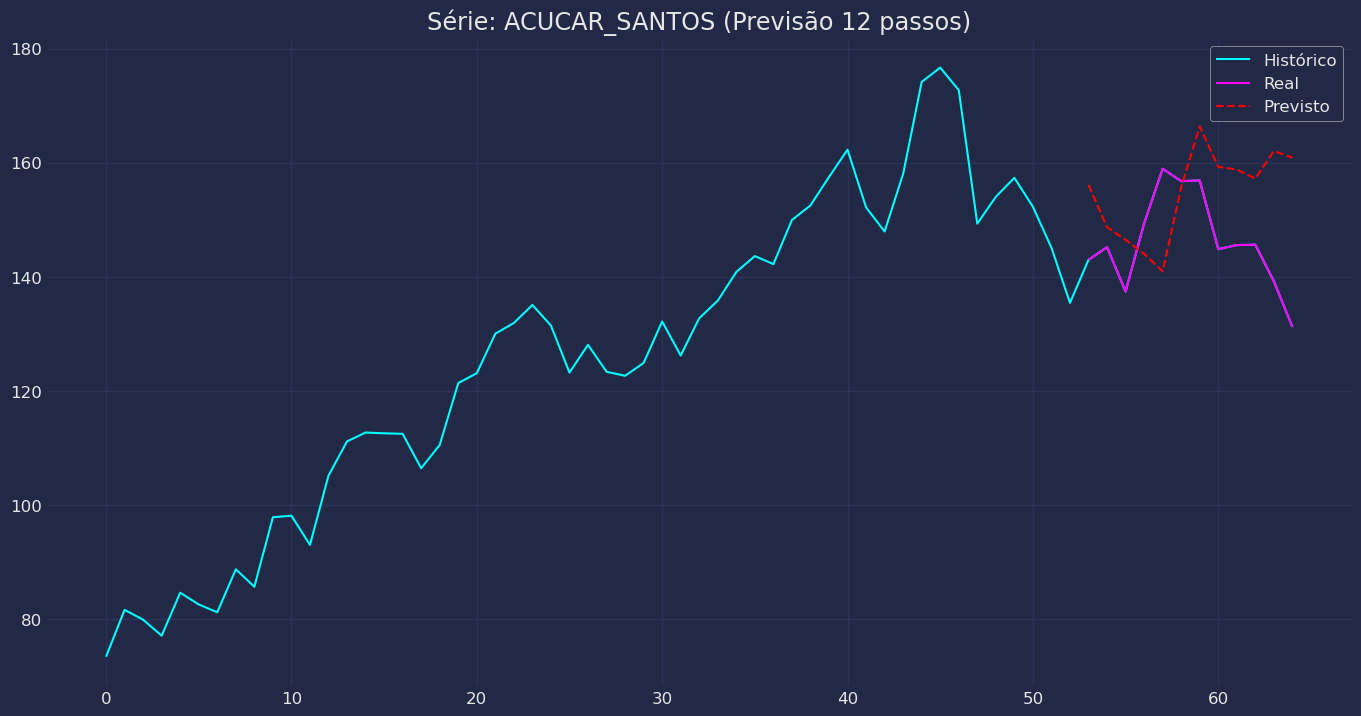


=== Série: ACUCAR_SP ===
Valores reais:     [135.73, 133.13, 130.74, 141.13, 152.82, 166.46, 161.64, 155.31, 143.74, 139.68, 142.35, 141.82]
Valores previstos: [140.52, 132.78, 130.91, 128.53, 130.3, 134.27, 148.63, 152.78, 149.33, 146.92, 146.14, 140.23]
MSE: 166.70 | RMSE: 12.91 | MAE: 8.86 | MAPE: 0.06%


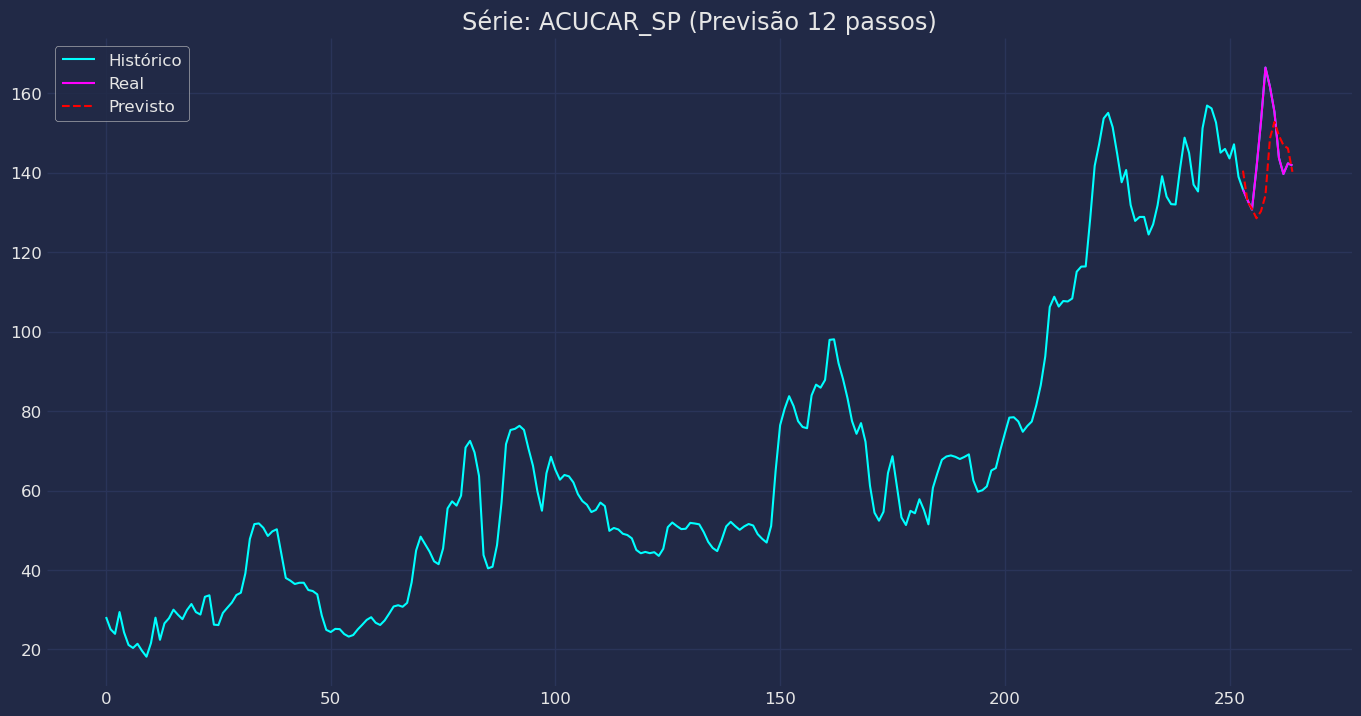


=== Série: ALGODAO ===
Valores reais:     [393.17, 407.93, 400.36, 396.86, 397.02, 396.07, 414.86, 415.66, 414.4, 421.48, 427.74, 439.19]
Valores previstos: [405.77, 400.01, 399.54, 399.1, 395.87, 396.14, 397.55, 400.26, 396.13, 394.87, 396.31, 408.81]
MSE: 309.88 | RMSE: 17.60 | MAE: 13.68 | MAPE: 0.03%


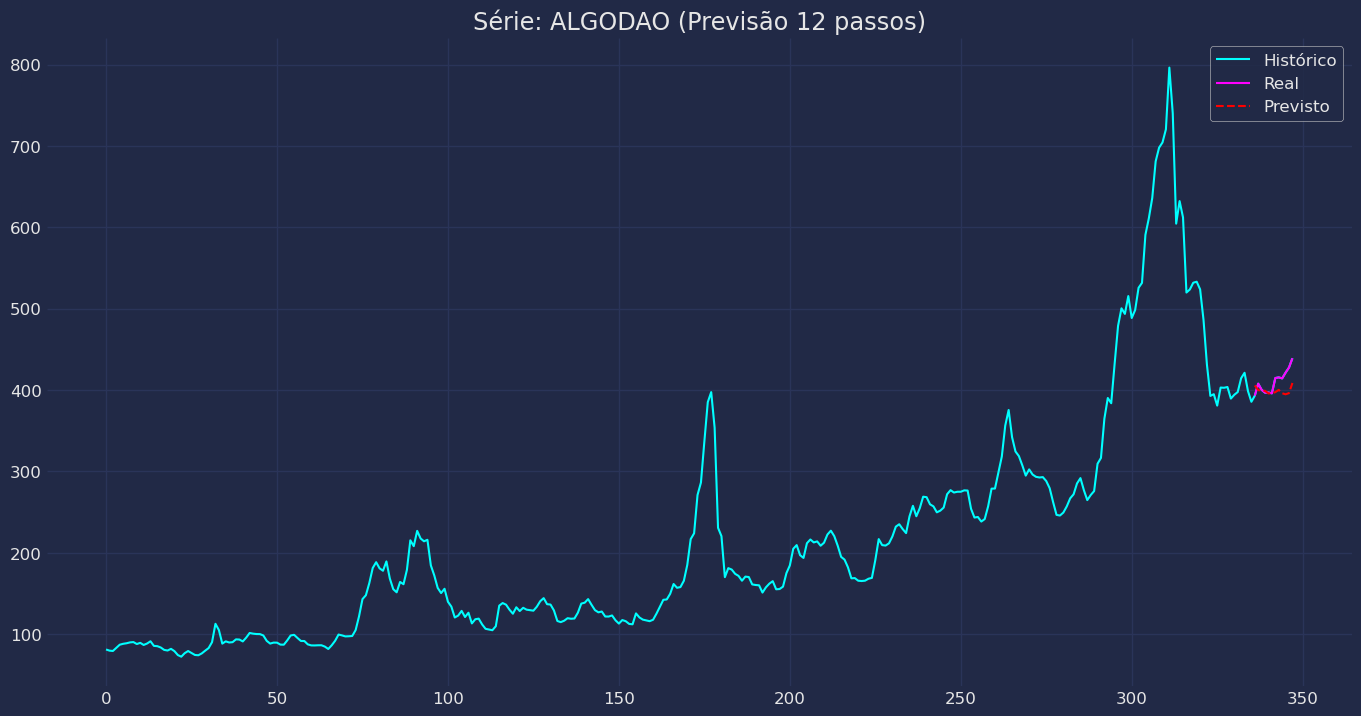


=== Série: ARROZ ===
Valores reais:     [114.56, 115.05, 117.57, 118.82, 119.29, 111.66, 99.9, 99.72, 95.7, 82.16, 76.3, 75.39]
Valores previstos: [103.15, 111.01, 109.2, 109.94, 113.31, 114.1, 115.28, 116.38, 113.26, 113.16, 108.36, 100.53]
MSE: 315.01 | RMSE: 17.75 | MAE: 14.91 | MAPE: 0.17%


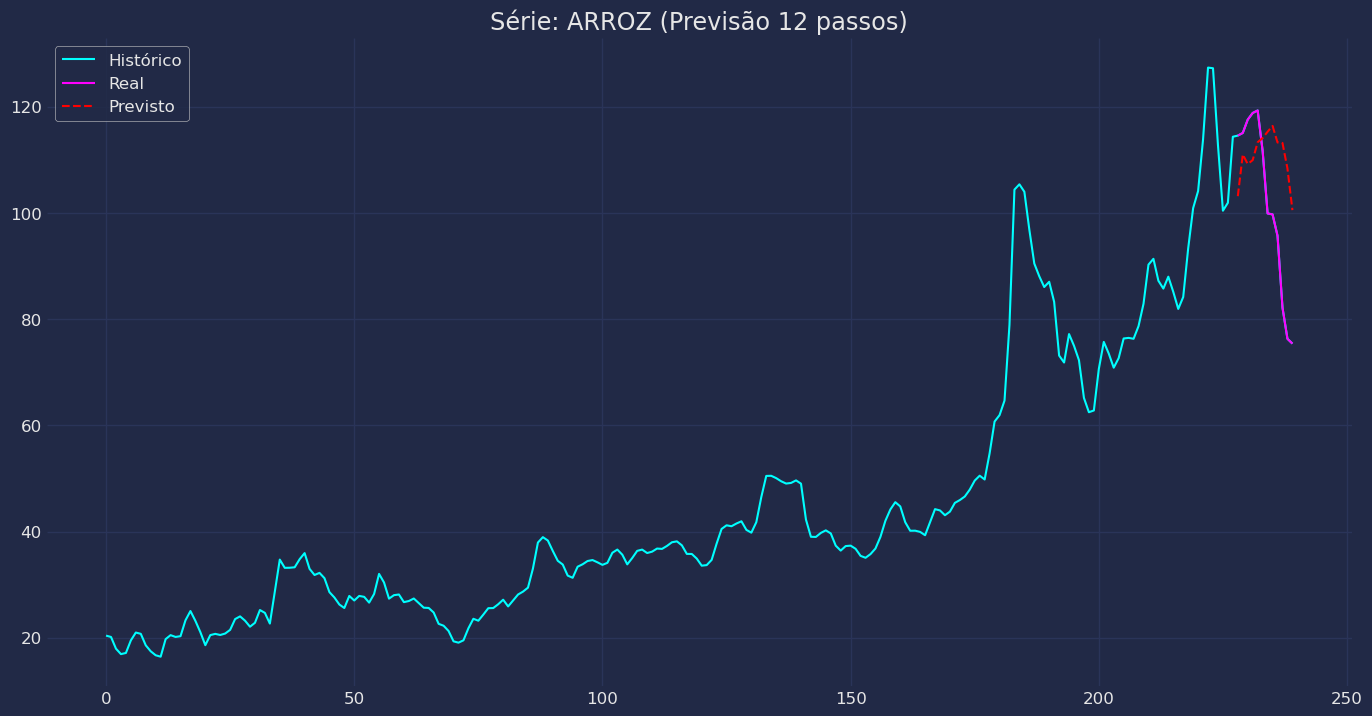


=== Série: CAFE_ARABICA ===
Valores reais:     [1349.22, 1419.72, 1431.37, 1472.73, 1490.14, 1776.55, 2154.89, 2332.87, 2627.79, 2544.72, 2523.93, 2585.36]
Valores previstos: [1305.34, 1383.23, 1415.16, 1379.65, 1334.17, 1316.48, 1331.03, 1458.71, 1656.14, 1890.69, 2151.47, 2360.44]
MSE: 271018.46 | RMSE: 520.59 | MAE: 393.90 | MAPE: 0.18%


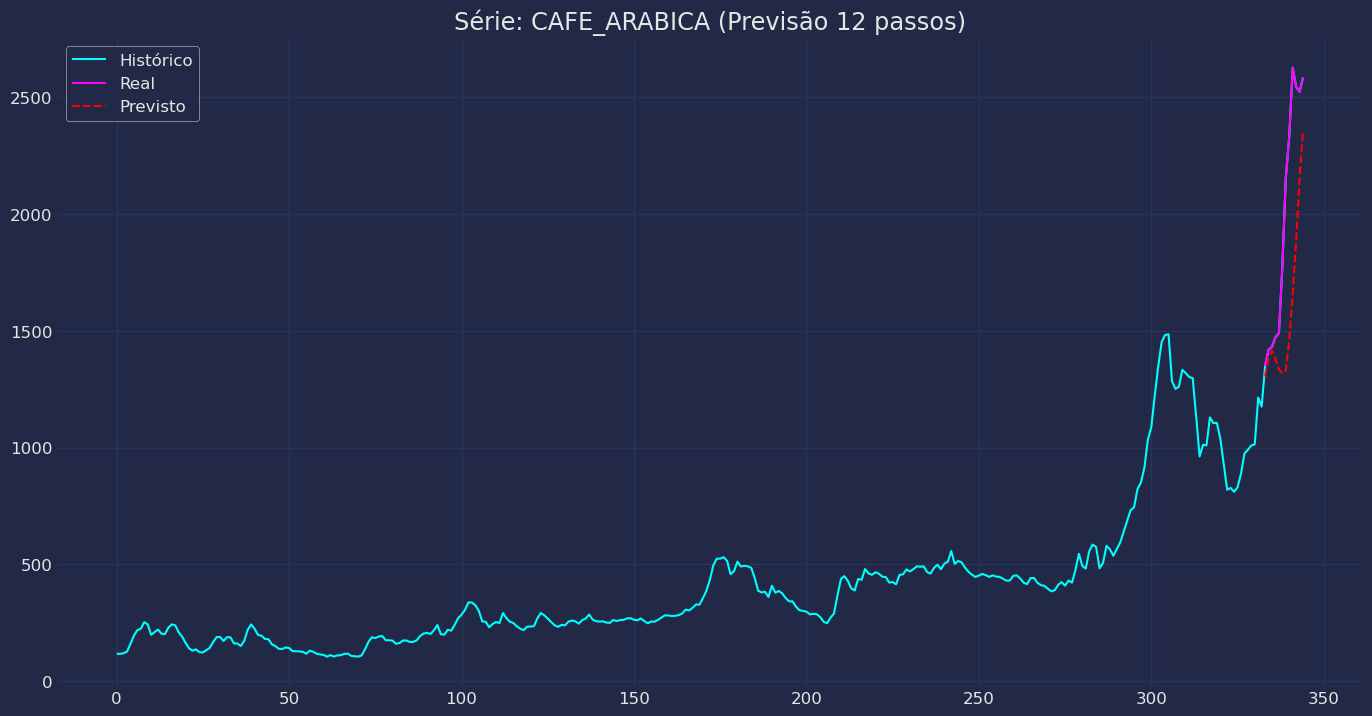


=== Série: CAFE_ROBUSTA ===
Valores reais:     [1214.22, 1270.41, 1340.75, 1497.46, 1416.72, 1573.28, 1785.4, 1977.68, 2050.09, 2003.02, 1692.32, 1660.79]
Valores previstos: [863.57, 905.9, 986.03, 1045.06, 1162.74, 1314.73, 1374.48, 1448.05, 1563.97, 1708.99, 1830.25, 1916.42]
MSE: 131179.11 | RMSE: 362.19 | MAE: 345.75 | MAPE: 0.22%


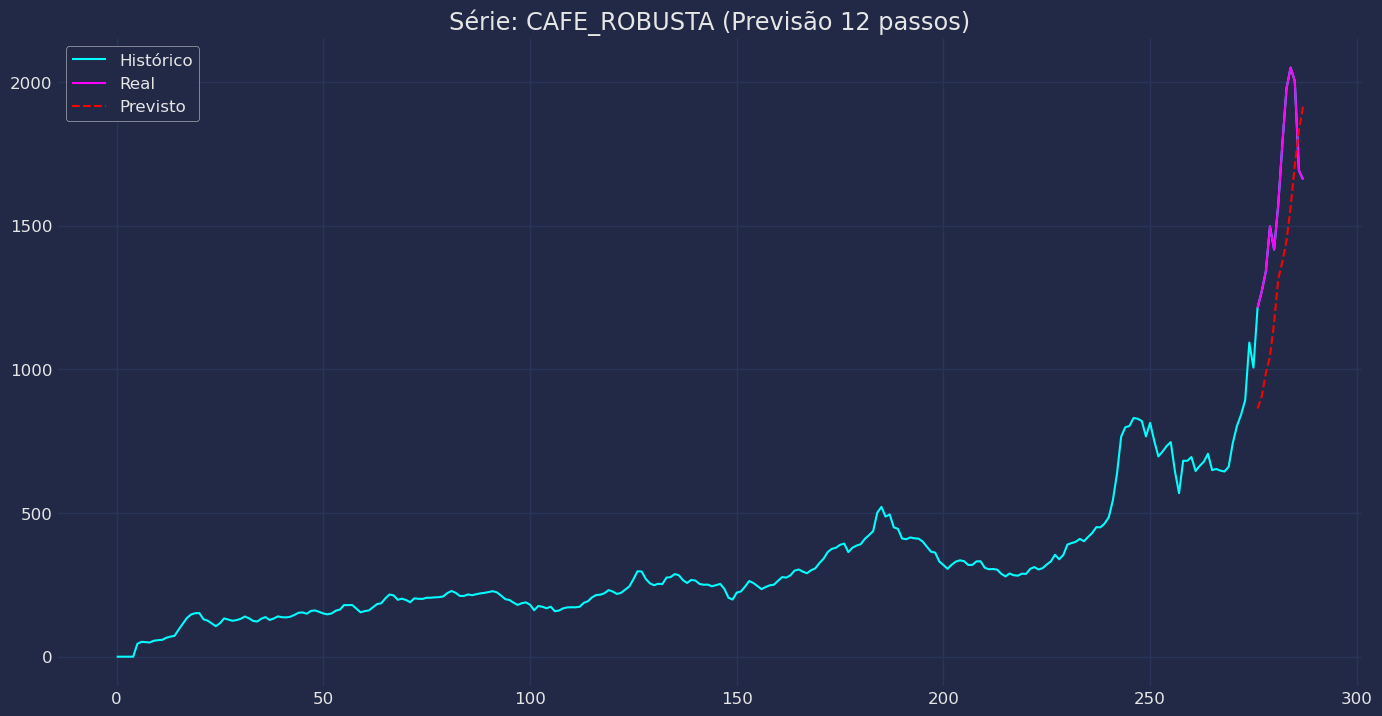


=== Série: MILHO ===
Valores reais:     [57.86, 57.22, 59.58, 62.6, 68.79, 73.68, 72.92, 74.17, 80.76, 89.12, 83.67, 78.03]
Valores previstos: [70.33, 64.6, 63.49, 60.93, 58.64, 59.54, 62.87, 68.84, 69.96, 77.03, 86.38, 92.36]
MSE: 94.67 | RMSE: 9.73 | MAE: 8.75 | MAPE: 0.12%


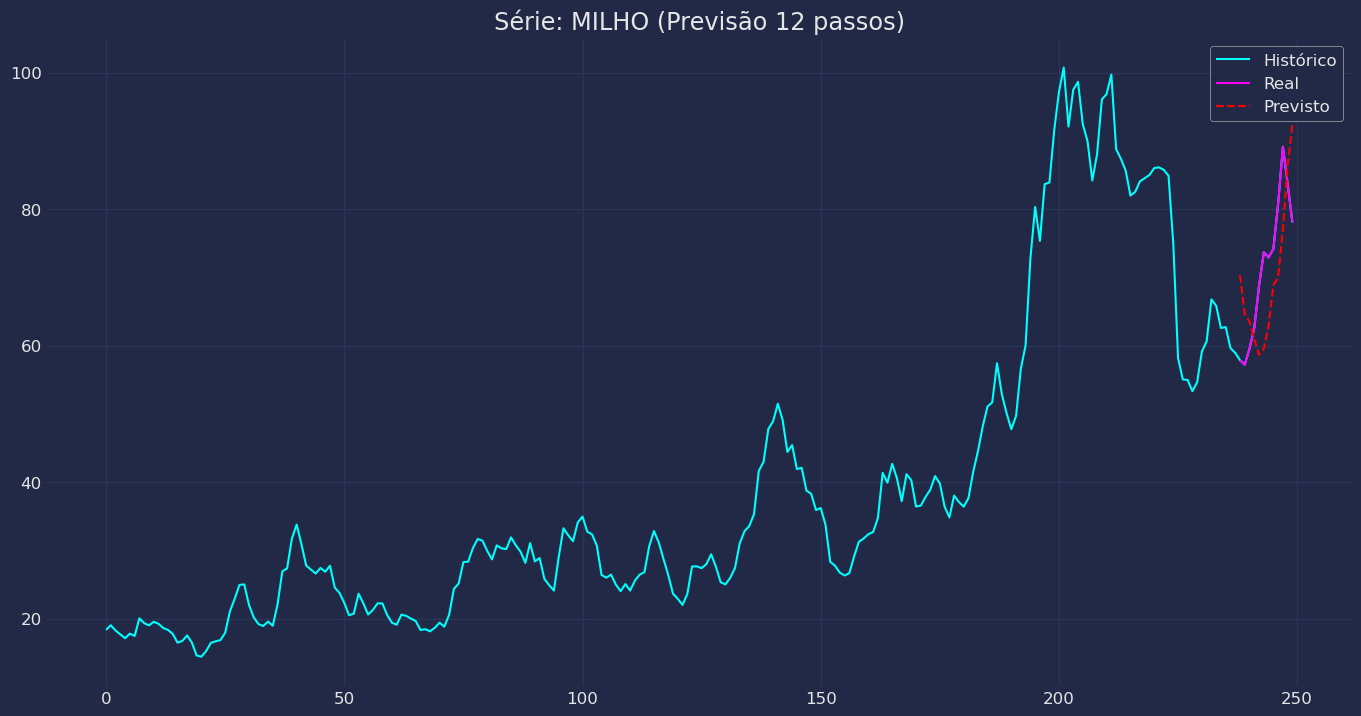


=== Série: SOJA_PARANA ===
Valores reais:     [133.98, 133.5, 129.24, 136.65, 139.71, 140.47, 138.38, 129.56, 126.01, 127.95, 129.83, 128.02]
Valores previstos: [121.54, 121.48, 124.18, 128.12, 125.56, 126.29, 129.78, 134.26, 135.72, 131.78, 128.28, 126.95]
MSE: 83.97 | RMSE: 9.16 | MAE: 7.99 | MAPE: 0.06%


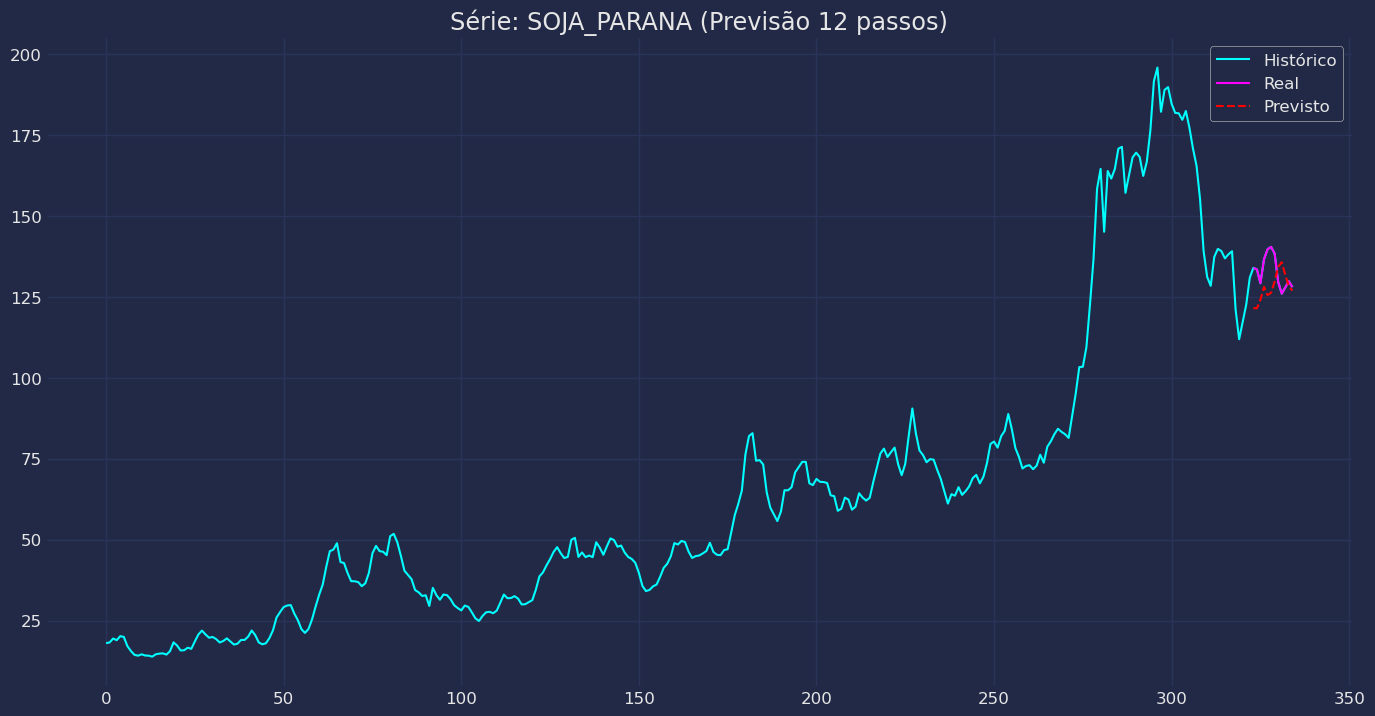


=== Série: SOJA_PARANAGUA ===
Valores reais:     [138.92, 138.09, 133.21, 139.9, 141.83, 143.41, 141.17, 134.62, 131.57, 133.49, 134.68, 132.8]
Valores previstos: [126.83, 126.47, 129.15, 132.89, 133.76, 130.89, 133.43, 137.56, 138.83, 135.89, 133.86, 133.38]
MSE: 58.08 | RMSE: 7.62 | MAE: 6.43 | MAPE: 0.05%


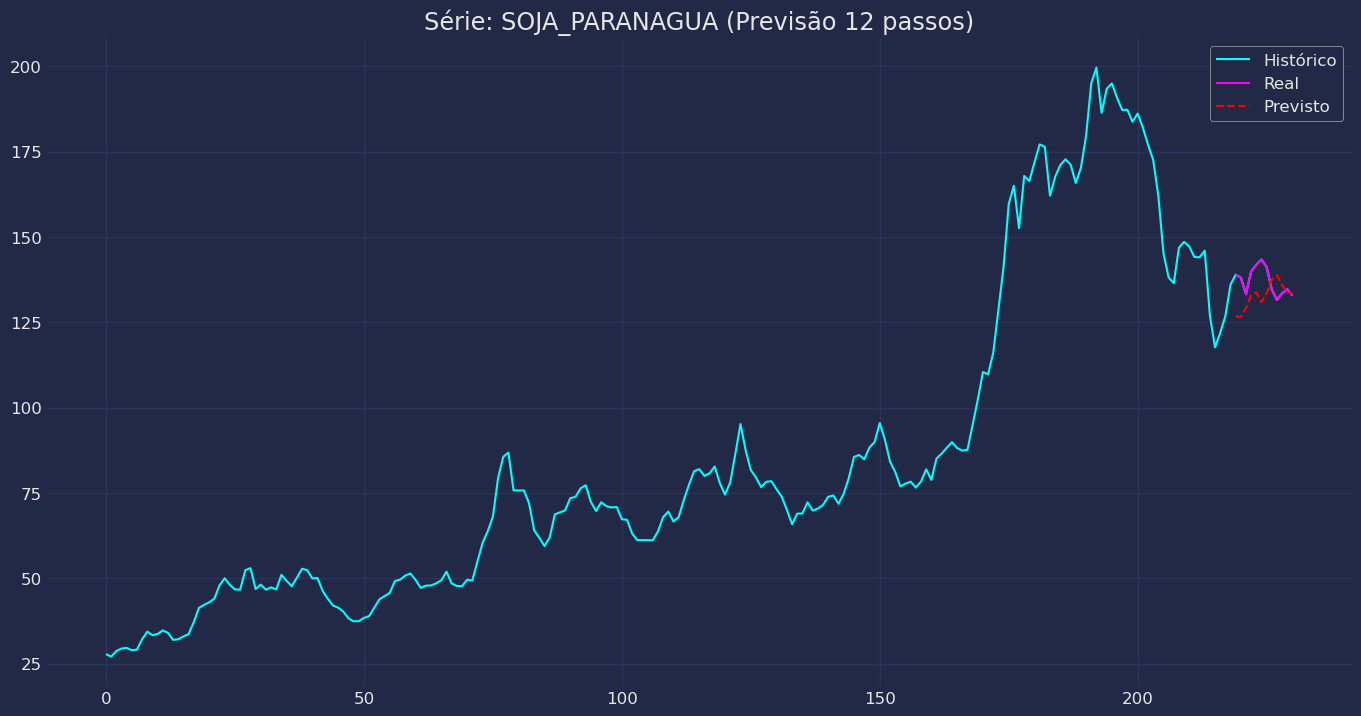


=== Série: TRIGO_PARANA ===
Valores reais:     [1516.78, 1542.91, 1538.62, 1481.31, 1430.49, 1429.98, 1396.91, 1409.27, 1449.63, 1519.97, 1564.46, 1564.26]
Valores previstos: [1512.17, 1571.13, 1569.07, 1565.29, 1576.93, 1597.61, 1601.47, 1556.32, 1559.16, 1563.84, 1588.11, 1631.42]
MSE: 11733.41 | RMSE: 108.32 | MAE: 88.10 | MAPE: 0.06%


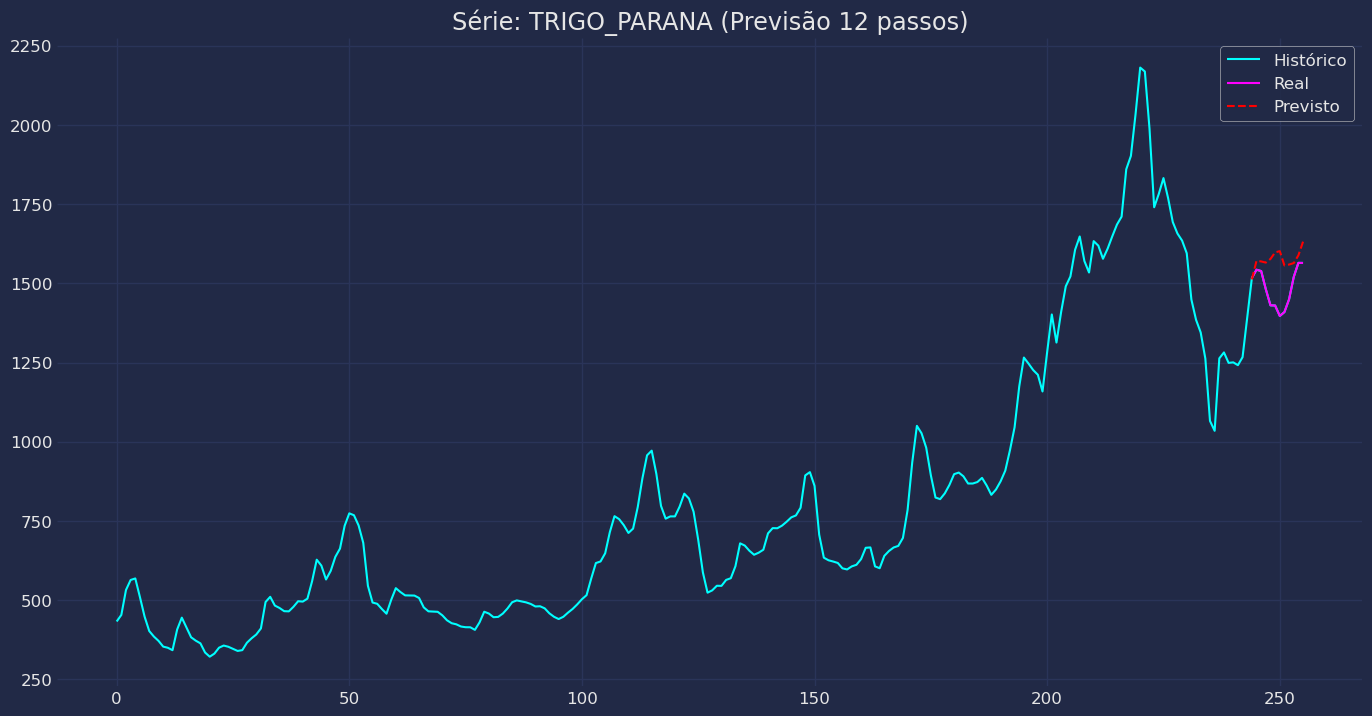


=== Série: TRIGO_RS ===
Valores reais:     [1422.08, 1465.1, 1429.85, 1363.92, 1279.45, 1265.61, 1252.77, 1270.02, 1324.57, 1398.39, 1469.93, 1468.17]
Valores previstos: [1244.04, 1280.08, 1495.32, 1505.54, 1509.91, 1490.63, 1469.95, 1454.68, 1401.08, 1395.38, 1241.49, 1313.48]
MSE: 29771.41 | RMSE: 172.54 | MAE: 157.51 | MAPE: 0.12%


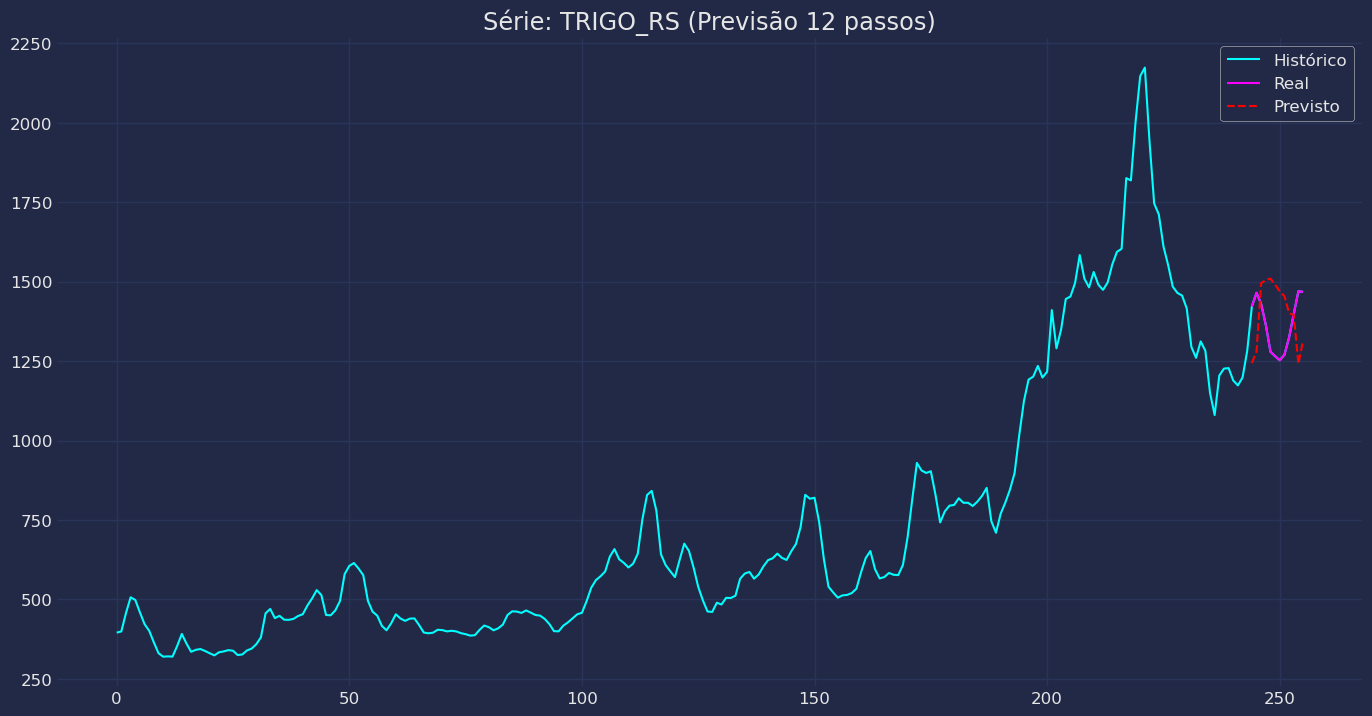


Resumo das métricas:
         unique_id            mse        rmse         mae      mape
0    ACUCAR_SANTOS     219.163411   14.804169   12.612396  0.088200
1        ACUCAR_SP     166.702626   12.911337    8.861966  0.057868
2          ALGODAO     309.880356   17.603419   13.684680  0.032576
3            ARROZ     315.012920   17.748603   14.909229  0.165667
4     CAFE_ARABICA  271018.464630  520.594338  393.896690  0.176230
5     CAFE_ROBUSTA  131179.109833  362.186568  345.753970  0.216941
6            MILHO      94.673749    9.730044    8.753538  0.122629
7      SOJA_PARANA      83.965279    9.163257    7.987863  0.059376
8   SOJA_PARANAGUA      58.077766    7.620877    6.426615  0.046359
9     TRIGO_PARANA   11733.411235  108.320872   88.095258  0.060888
10        TRIGO_RS   29771.414005  172.543948  157.509043  0.116538


In [27]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score
)


dcs = DCSLARegressor(models, similarity='euclidean')

horizon = 12
results = []

for uid in df_brl['unique_id'].unique():
    print(f"\n=== Série: {uid} ===")

    # extrair série
    y_series = df_brl[df_brl['unique_id'] == uid]['y'].values

    # previsão
    forecast, y_real_future = dcs.predict(y_series, horizon=horizon)

    # métricas
    mse = mean_squared_error(y_real_future, forecast)
    rmse = root_mean_squared_error(y_real_future, forecast)
    mae = mean_absolute_error(y_real_future, forecast)
    mape = mean_absolute_percentage_error(y_real_future, forecast)

    results.append({
        "unique_id": uid,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "y_real_future": y_real_future,
        "forecast": forecast
    })

    # printar arrays e métricas
    print("Valores reais:    ", np.round(y_real_future, 2).tolist())
    print("Valores previstos:", np.round(forecast, 2).tolist())
    print(f"MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}%")

    # plotar série inteira
    plt.figure(figsize=(15, 8))
    plt.plot(y_series, label="Histórico", color="cyan")
    plt.plot(range(len(y_series)-horizon, len(y_series)), y_real_future, label="Real", color="fuchsia")
    plt.plot(range(len(y_series)-horizon, len(y_series)), forecast, label="Previsto", color="red", linestyle="--")
    plt.title(f"Série: {uid} (Previsão {horizon} passos)")
    plt.legend()
    plt.show()

# Converter resultados em DataFrame para análise geral
df_results = pd.DataFrame(results)
print("\nResumo das métricas:")
print(df_results[["unique_id", "mse", "rmse", "mae", "mape"]])